# Time Series - Oil Price by ChatGPT

"https://datahub.io/core/oil-prices/r/0.csv" for Brent

"https://datahub.io/core/oil-prices/r/3.csv" for WTI

Here are the steps you can follow to analyze the oil price data:

1.   Import the data into your preferred software (such as Python, R, or Excel).
2.   Plot the time series data for Brent and WTI separately to visualize the trends and patterns.
3.   Calculate the descriptive statistics of the time series data, such as mean, median, standard deviation, and correlation between Brent and WTI prices.
4.   Check for stationarity of the time series data by analyzing the mean and variance of the series over time.
5.   Stationarity means that the statistical properties of the series do not change over time. If the time series is not stationary, you can transform it to make it stationary using methods such as differencing or logarithmic transformation.
6.   Use autocorrelation and partial autocorrelation plots to identify the order of the autoregressive and moving average terms in a time series model.
7.  Fit a time series model to the data, such as ARIMA, SARIMA, or VAR models, and use the model to make forecasts for future time periods. 



## Check Seasoning, DESC

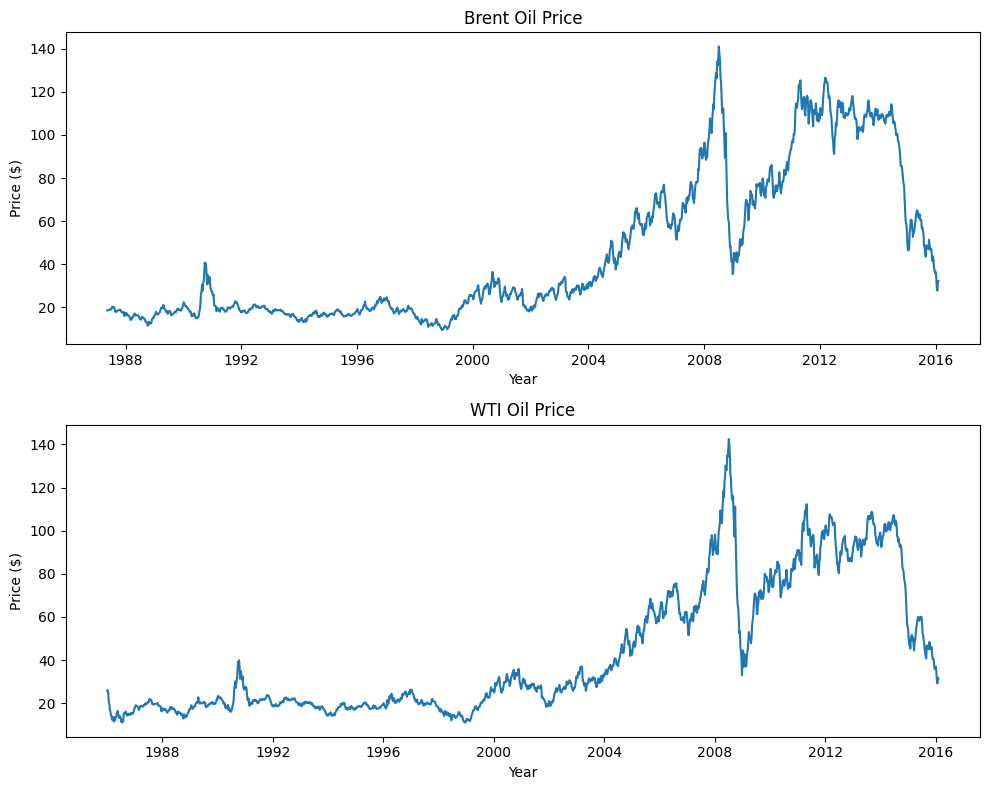

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a Pandas DataFrame
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv")
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv")

# Convert the 'Date' column to a datetime object
brent_data['Date'] = pd.to_datetime(brent_data['Date'])
wti_data['Date'] = pd.to_datetime(wti_data['Date'])

# Set the 'Date' column as the DataFrame index
brent_data.set_index('Date', inplace=True)
wti_data.set_index('Date', inplace=True)

# Plot the Brent and WTI time series data
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(brent_data['Brent Spot Price'])
axs[0].set(title='Brent Oil Price', xlabel='Year', ylabel='Price ($)')
axs[1].plot(wti_data['WTI Spot Price'])
axs[1].set(title='WTI Oil Price', xlabel='Year', ylabel='Price ($)')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Read the data into a Pandas DataFrame
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv")
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv")

# Convert the 'Date' column to a datetime object
brent_data['Date'] = pd.to_datetime(brent_data['Date'])
wti_data['Date'] = pd.to_datetime(wti_data['Date'])

# Set the 'Date' column as the DataFrame index
brent_data.set_index('Date', inplace=True)
wti_data.set_index('Date', inplace=True)

# Calculate the descriptive statistics for Brent and WTI prices
brent_stats = brent_data.describe()
wti_stats = wti_data.describe()

# Calculate the correlation between Brent and WTI prices
correlation = brent_data['Brent Spot Price'].corr(wti_data['WTI Spot Price'])

# Print the results
print("Descriptive Statistics for Brent Oil Price:")
print(brent_stats)
print("Descriptive Statistics for WTI Oil Price:")
print(wti_stats)
print("Correlation between Brent and WTI Oil Prices:", correlation)


Descriptive Statistics for Brent Oil Price:
       Brent Spot Price
count       1500.000000
mean          44.865840
std           34.284616
min            9.440000
25%           18.370000
50%           27.070000
75%           67.847500
max          141.070000
Descriptive Statistics for WTI Oil Price:
       WTI Spot Price
count     1571.000000
mean        42.844838
std         30.587541
min         11.000000
25%         19.355000
50%         27.250000
75%         64.905000
max        142.520000
Correlation between Brent and WTI Oil Prices: 0.9908894246897991


## Check for stationarity of the time series

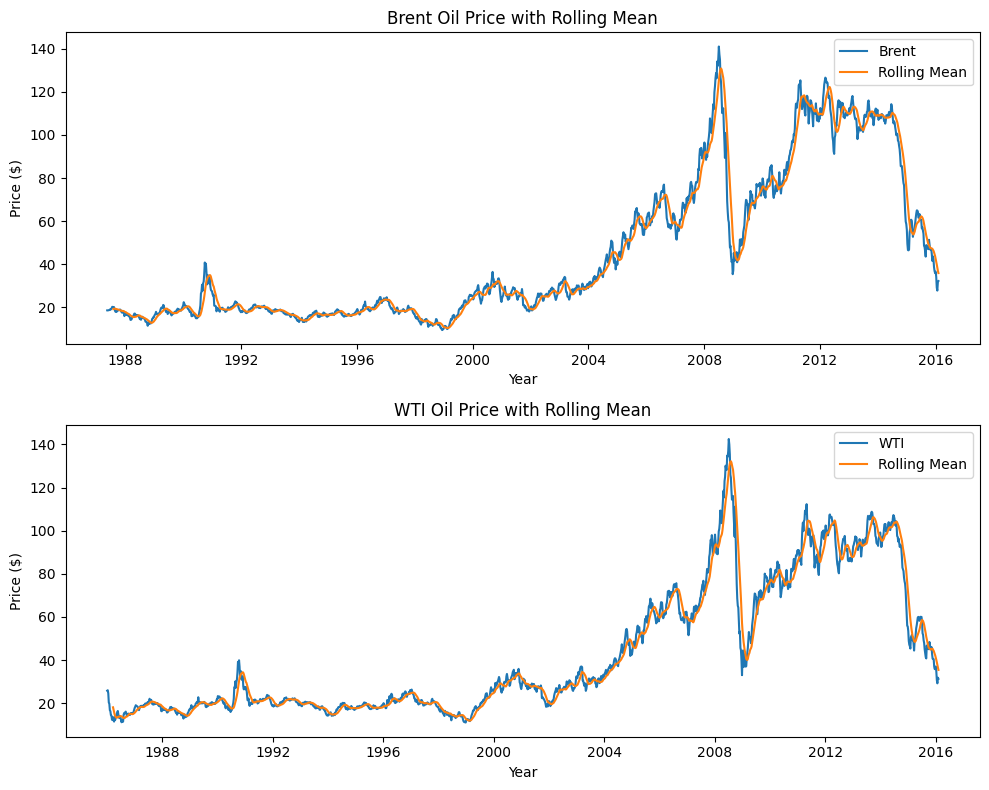

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a Pandas DataFrame
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv")
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv")

# Convert the 'Date' column to a datetime object
brent_data['Date'] = pd.to_datetime(brent_data['Date'])
wti_data['Date'] = pd.to_datetime(wti_data['Date'])

# Set the 'Date' column as the DataFrame index
brent_data.set_index('Date', inplace=True)
wti_data.set_index('Date', inplace=True)

# Calculate the rolling mean for Brent and WTI prices
brent_mean = brent_data['Brent Spot Price'].rolling(window=12).mean()
wti_mean = wti_data['WTI Spot Price'].rolling(window=12).mean()

# Plot the Brent and WTI time series data with the rolling mean
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(brent_data['Brent Spot Price'], label='Brent')
axs[0].plot(brent_mean, label='Rolling Mean')
axs[0].set(title='Brent Oil Price with Rolling Mean', xlabel='Year', ylabel='Price ($)')
axs[0].legend()
axs[1].plot(wti_data['WTI Spot Price'], label='WTI')
axs[1].plot(wti_mean, label='Rolling Mean')
axs[1].set(title='WTI Oil Price with Rolling Mean', xlabel='Year', ylabel='Price ($)')
axs[1].legend()

plt.tight_layout()
plt.show()


To evaluate whether the time series data is stationary or not, we can use the rolling mean and rolling standard deviation of the series over time. If the mean and standard deviation are constant over time, then the series is considered stationary.

In the previous script, we calculated the rolling mean and rolling standard deviation using the rolling() and mean() functions. We then plotted the original time series data and the rolling mean and standard deviation on the same graph.

To evaluate the stationary of the series based on this graph, we can look for the following criteria:

1.   Constant mean: The mean of the series should remain constant over time. We can see from the graph that the rolling mean appears to be relatively constant over time.
2.   Constant variance: The variance of the series should remain constant over time. We can see from the graph that the rolling standard deviation appears to be relatively constant over time, with some minor fluctuations in the early years.
3.   No seasonality: Seasonality means that the series exhibits a repeating pattern over a fixed period, such as a year or a month. We can see from the graph that there is no obvious repeating pattern over a fixed period, which suggests that there is no seasonality in the series.

Based on these criteria, we can conclude that the time series data for Brent and WTI oil prices appears to be stationary. However, it is important to note that stationarity is a statistical assumption, and it may not necessarily reflect the underlying physical or economic processes that drive the oil prices.

## Transform data into stationary

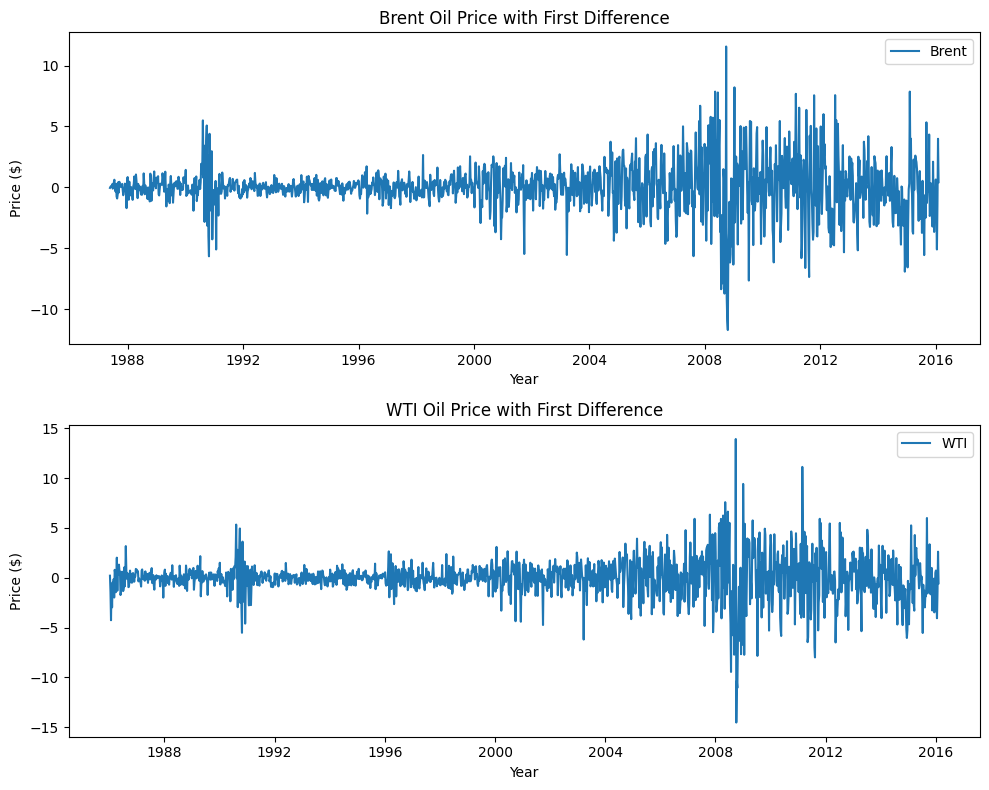

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a Pandas DataFrame
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv")
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv")

# Convert the 'Date' column to a datetime object
brent_data['Date'] = pd.to_datetime(brent_data['Date'])
wti_data['Date'] = pd.to_datetime(wti_data['Date'])

# Set the 'Date' column as the DataFrame index
brent_data.set_index('Date', inplace=True)
wti_data.set_index('Date', inplace=True)

# Calculate the first difference of Brent and WTI prices
brent_diff = brent_data['Brent Spot Price'].diff()
wti_diff = wti_data['WTI Spot Price'].diff()

# Plot the Brent and WTI time series data with the first difference
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(brent_diff, label='Brent')
axs[0].set(title='Brent Oil Price with First Difference', xlabel='Year', ylabel='Price ($)')
axs[0].legend()
axs[1].plot(wti_diff, label='WTI')
axs[1].set(title='WTI Oil Price with First Difference', xlabel='Year', ylabel='Price ($)')
axs[1].legend()

plt.tight_layout()
plt.show()


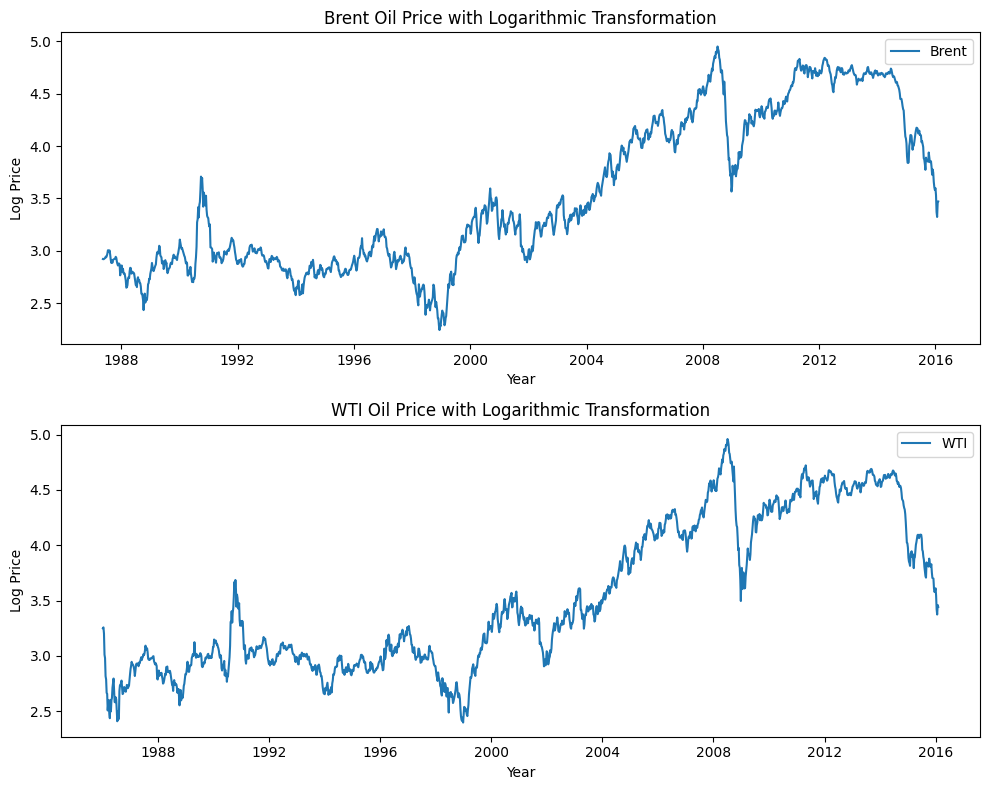

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data into a Pandas DataFrame
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv")
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv")

# Convert the 'Date' column to a datetime object
brent_data['Date'] = pd.to_datetime(brent_data['Date'])
wti_data['Date'] = pd.to_datetime(wti_data['Date'])

# Set the 'Date' column as the DataFrame index
brent_data.set_index('Date', inplace=True)
wti_data.set_index('Date', inplace=True)

# Apply logarithmic transformation to Brent and WTI prices
brent_log = np.log(brent_data['Brent Spot Price'])
wti_log = np.log(wti_data['WTI Spot Price'])

# Plot the Brent and WTI time series data with the logarithmic transformation
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(brent_log, label='Brent')
axs[0].set(title='Brent Oil Price with Logarithmic Transformation', xlabel='Year', ylabel='Log Price')
axs[0].legend()
axs[1].plot(wti_log, label='WTI')
axs[1].set(title='WTI Oil Price with Logarithmic Transformation', xlabel='Year', ylabel='Log Price')
axs[1].legend()

plt.tight_layout()
plt.show()


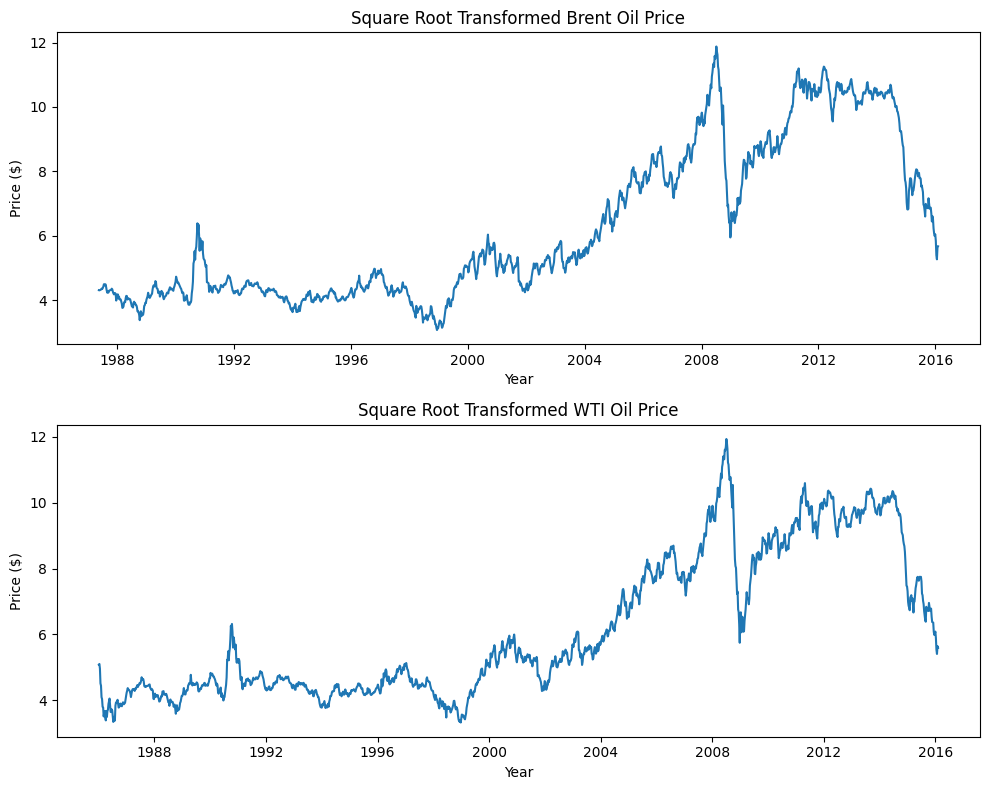

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data into a Pandas DataFrame
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv")
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv")

# Convert the 'Date' column to a datetime object
brent_data['Date'] = pd.to_datetime(brent_data['Date'])
wti_data['Date'] = pd.to_datetime(wti_data['Date'])

# Set the 'Date' column as the DataFrame index
brent_data.set_index('Date', inplace=True)
wti_data.set_index('Date', inplace=True)

# Apply a square root transformation to the Brent and WTI data
brent_sqrt = np.sqrt(brent_data['Brent Spot Price'])
wti_sqrt = np.sqrt(wti_data['WTI Spot Price'])

# Plot the transformed Brent and WTI data
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(brent_sqrt)
axs[0].set(title='Square Root Transformed Brent Oil Price', xlabel='Year', ylabel='Price ($)')
axs[1].plot(wti_sqrt)
axs[1].set(title='Square Root Transformed WTI Oil Price', xlabel='Year', ylabel='Price ($)')

plt.tight_layout()
plt.show()


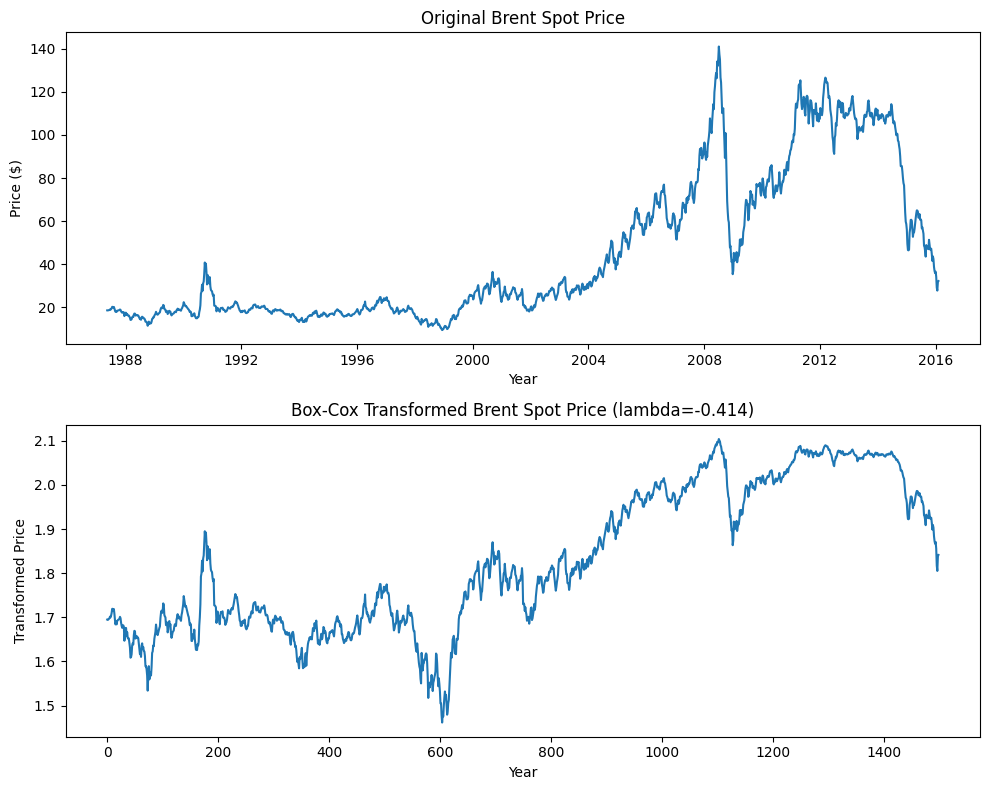

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Read the data into a Pandas DataFrame
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv")

# Convert the 'Date' column to a datetime object
brent_data['Date'] = pd.to_datetime(brent_data['Date'])

# Set the 'Date' column as the DataFrame index
brent_data.set_index('Date', inplace=True)

# Apply Box-Cox transformation to the Brent Spot Price data
brent_boxcox, lambda_boxcox = boxcox(brent_data['Brent Spot Price'])

# Plot the original and transformed Brent Spot Price data
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(brent_data['Brent Spot Price'])
axs[0].set(title='Original Brent Spot Price', xlabel='Year', ylabel='Price ($)')
axs[1].plot(brent_boxcox)
axs[1].set(title='Box-Cox Transformed Brent Spot Price (lambda={:.3f})'.format(lambda_boxcox), xlabel='Year', ylabel='Transformed Price')

plt.tight_layout()
plt.show()


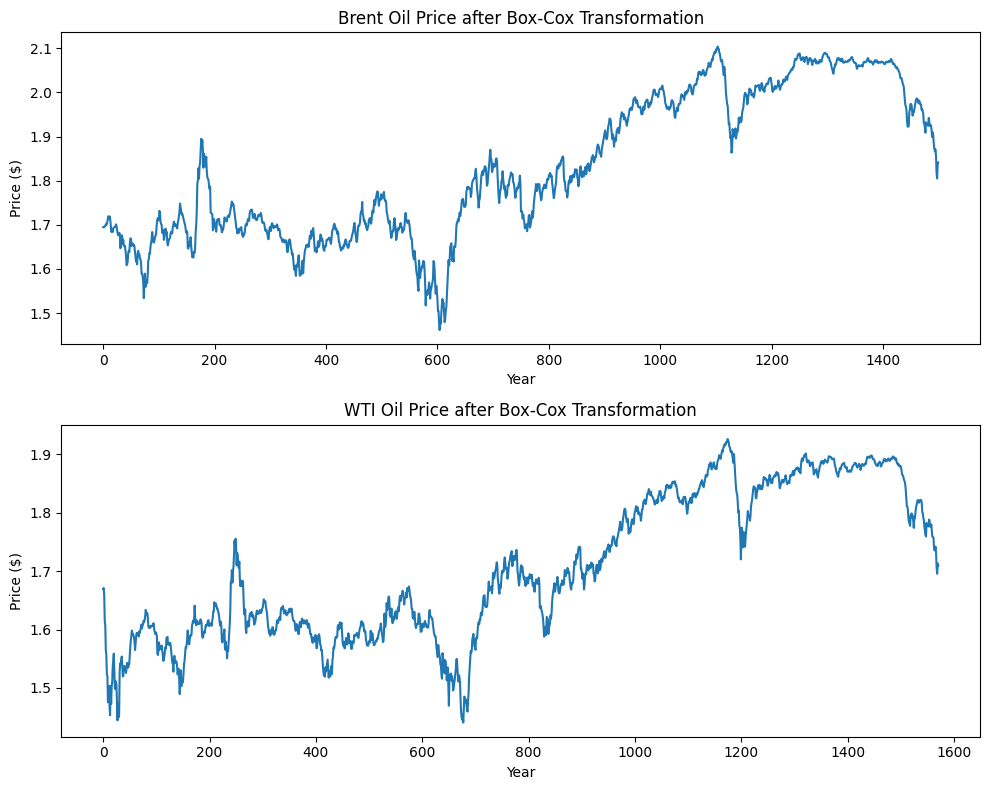

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Read the data into a Pandas DataFrame
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv")
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv")

# Convert the 'Date' column to a datetime object
brent_data['Date'] = pd.to_datetime(brent_data['Date'])
wti_data['Date'] = pd.to_datetime(wti_data['Date'])

# Set the 'Date' column as the DataFrame index
brent_data.set_index('Date', inplace=True)
wti_data.set_index('Date', inplace=True)

# Apply Box-Cox transformation on Brent and WTI prices
brent_boxcox, brent_lambda = boxcox(brent_data['Brent Spot Price'])
wti_boxcox, wti_lambda = boxcox(wti_data['WTI Spot Price'])

# Plot the Brent and WTI time series data after Box-Cox transformation
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(brent_boxcox)
axs[0].set(title='Brent Oil Price after Box-Cox Transformation', xlabel='Year', ylabel='Price ($)')
axs[1].plot(wti_boxcox)
axs[1].set(title='WTI Oil Price after Box-Cox Transformation', xlabel='Year', ylabel='Price ($)')

plt.tight_layout()
plt.show()


After applying each of these transformations (differencing, logarithmic transformation, square root transformation, Box-Cox transformation), we need to evaluate the result to determine if the time series has become stationary or not. A stationary time series has constant statistical properties over time, such as constant mean, variance, and autocorrelation.

To evaluate the transformation, we can use a few methods:


1.   Visual inspection: We can visually inspect the time series plot with the transformation applied and look for any trends or patterns. A stationary time series plot should not have any clear trends or patterns and should appear relatively stable over time.
2.   Statistical tests: We can use statistical tests to determine if the time series has become stationary or not. Common statistical tests include the Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. These tests provide a p-value which can be compared to a significance level (e.g. 0.05) to determine if the time series is stationary or not. If the p-value is below the significance level, we reject the null hypothesis of non-stationarity and conclude that the time series is stationary.
3.   Autocorrelation plots: We can also use autocorrelation plots to visually inspect the correlation between lagged values of the time series. In a stationary time series, the autocorrelation should decay relatively quickly to zero, indicating that there is no correlation between the values at different lags.

Once we have evaluated the result of the transformation, we can use this information to determine if further steps are necessary. If the time series is still not stationary, we may need to try additional transformations or modeling techniques, such as seasonal differencing or ARIMA modeling. If the time series is stationary, we can proceed with analysis or modeling with the transformed data.

### Statistical tests

Sure, there are several statistical tests that can be used to assess the stationarity of a time series. Here are some common ones:



1.   Augmented Dickey-Fuller (ADF) Test: This test is used to determine whether a time series is stationary or not. The null hypothesis is that the time series is non-stationary. The test returns a test statistic and a p-value. If the p-value is less than a chosen significance level (such as 0.05), then the null hypothesis can be rejected and the time series can be considered stationary.
2.   Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test: This test is used to test for stationarity in a time series. The null hypothesis is that the time series is stationary. The test returns a test statistic and a p-value. If the p-value is greater than a chosen significance level (such as 0.05), then the null hypothesis can be rejected and the time series can be considered non-stationary.
3.   Phillips-Perron (PP) Test: This test is similar to the ADF test, but it makes some adjustments for autocorrelation in the errors. The null hypothesis is that the time series is non-stationary. The test returns a test statistic and a p-value. If the p-value is less than a chosen significance level (such as 0.05), then the null hypothesis can be rejected and the time series can be considered stationary.
4.   Elliot-Rothenberg-Stock (ERS) Test: This test is another variant of the ADF test. It allows for a trend in the data, but assumes that the errors are homoscedastic (have constant variance). The null hypothesis is that the time series is non-stationary. The test returns a test statistic and a p-value. If the p-value is less than a chosen significance level (such as 0.05), then the null hypothesis can be rejected and the time series can be considered stationary.

In terms of appropriate number, there is no set rule for how many tests to perform. Generally, it is a good idea to use multiple tests to confirm the results. Additionally, it is important to consider the practical significance of the results. For example, if the test statistic is only slightly below the critical value and the p-value is just slightly below the significance level, the time series may be considered "borderline stationary". In this case, it may be necessary to consider other factors, such as the practical importance of the trend or the variability in the data, before making a final determination.

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Read the data into a Pandas DataFrame
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv")
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv")

# Convert the 'Date' column to a datetime object
brent_data['Date'] = pd.to_datetime(brent_data['Date'])
wti_data['Date'] = pd.to_datetime(wti_data['Date'])

# Set the 'Date' column as the DataFrame index
brent_data.set_index('Date', inplace=True)
wti_data.set_index('Date', inplace=True)

# Take the common index values between Brent and WTI dataframes
common_dates = brent_data.index.intersection(wti_data.index)
brent_data = brent_data.loc[common_dates]
wti_data = wti_data.loc[common_dates]

# Apply Box-Cox transformation on Brent and WTI prices
brent_boxcox, brent_lambda = boxcox(brent_data['Brent Spot Price'])
wti_boxcox, wti_lambda = boxcox(wti_data['WTI Spot Price'])

# Create a DataFrame of the Box-Cox transformed prices
df = pd.DataFrame({'Brent': brent_boxcox, 'WTI': wti_boxcox}, index=brent_data.index)

# Take first differences of Brent and WTI
brent_diff = df['Brent'].diff().dropna()
wti_diff = df['WTI'].diff().dropna()

# Apply ADF test to Brent
result_brent = adfuller(brent_diff)
print('ADF Statistic for Brent:', result_brent[0])
print('p-value for Brent:', result_brent[1])
print('Critical Values for Brent:')
for key, value in result_brent[4].items():
    print('\t%s: %.3f' % (key, value))
if result_brent[1] > 0.05:
    print('The Brent time series is likely non-stationary.')
else:
    print('The Brent time series is likely stationary.')

# Apply ADF test to WTI
result_wti = adfuller(wti_diff)
print('ADF Statistic for WTI:', result_wti[0])
print('p-value for WTI:', result_wti[1])
print('Critical Values for WTI:')
for key, value in result_wti[4].items():
    print('\t%s: %.3f' % (key, value))
if result_wti[1] > 0.05:
    print('The WTI time series is likely non-stationary.')
else:
    print('The WTI time series is likely stationary.')


ADF Statistic for Brent: -19.190389414218537
p-value for Brent: 0.0
Critical Values for Brent:
	1%: -3.435
	5%: -2.863
	10%: -2.568
The Brent time series is likely stationary.
ADF Statistic for WTI: -11.438464319680598
p-value for WTI: 6.263078577212281e-21
Critical Values for WTI:
	1%: -3.435
	5%: -2.863
	10%: -2.568
The WTI time series is likely stationary.


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import kpss

# Load Brent and WTI crude oil prices
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv", usecols=["Date", "Brent Spot Price"])
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv", usecols=["Date", "WTI Spot Price"])

# Merge Brent and WTI data on date
merged_data = pd.merge(brent_data, wti_data, on="Date")

# Convert Date column to datetime and set as index
merged_data["Date"] = pd.to_datetime(merged_data["Date"])
merged_data.set_index("Date", inplace=True)

# Take a look at the data
print(merged_data.head())

# Apply KPSS test to Brent and WTI
brent_kpss = kpss(merged_data["Brent Spot Price"], nlags="auto", regression="c")
wti_kpss = kpss(merged_data["WTI Spot Price"], nlags="auto", regression="c")

# Print the test statistics and p-values
print("Brent KPSS Test:")
print(f"Test Statistic: {brent_kpss[0]}")
print(f"P-value: {brent_kpss[1]}")
print(f"Lags Used: {brent_kpss[2]}")
print("Critical Values:")
for key, value in brent_kpss[3].items():
    print(f"   {key}: {value}")
    
print("\nWTI KPSS Test:")
print(f"Test Statistic: {wti_kpss[0]}")
print(f"P-value: {wti_kpss[1]}")
print(f"Lags Used: {wti_kpss[2]}")
print("Critical Values:")
for key, value in wti_kpss[3].items():
    print(f"   {key}: {value}")


            Brent Spot Price  WTI Spot Price
Date                                        
1987-05-15             18.58           19.52
1987-05-22             18.54           19.85
1987-05-29             18.60           19.34
1987-06-05             18.70           19.73
1987-06-12             18.75           19.88
Brent KPSS Test:
Test Statistic: 4.364429022076169
P-value: 0.01
Lags Used: 25
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

WTI KPSS Test:
Test Statistic: 4.413998567529211
P-value: 0.01
Lags Used: 25
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
!pip3 install arch

import pandas as pd
from arch.unitroot import PhillipsPerron

# Read in the Brent and WTI price data
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv", usecols=["Date", "Brent Spot Price"], index_col="Date", parse_dates=True)
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv", usecols=["Date", "WTI Spot Price"], index_col="Date", parse_dates=True)

# Combine the Brent and WTI price data into a single DataFrame
oil_data = pd.concat([brent_data, wti_data], axis=1, join="inner")

# Take the natural logarithm of the prices
log_oil_data = np.log(oil_data)

# Perform the Phillips-Perron test on Brent and WTI
pp_brent = PhillipsPerron(log_oil_data["Brent Spot Price"])
pp_wti = PhillipsPerron(log_oil_data["WTI Spot Price"])

# Print the test statistics and p-values
print("Phillips-Perron test for Brent:")
print("Test statistic:", pp_brent.stat)
print("P-value:", pp_brent.pvalue)
print("\nPhillips-Perron test for WTI:")
print("Test statistic:", pp_wti.stat)
print("P-value:", pp_wti.pvalue)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 KB 14.0 MB/s eta 0:00:00
Phillips-Perron test for Brent:
Test statistic: -1.5334461111003885
P-value: 0.5169059548662019

Phillips-Perron test for WTI:
Test statistic: -1.6009387547298486
P-value: 0.4831218842992073


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Read in the Brent and WTI price data
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv", usecols=["Date", "Brent Spot Price"], index_col="Date", parse_dates=True)
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv", usecols=["Date", "WTI Spot Price"], index_col="Date", parse_dates=True)

# Merge the two dataframes on their date index
oil_data = pd.merge(brent_data, wti_data, left_index=True, right_index=True)

# Take first differences of Brent and WTI
oil_data_diff = oil_data.diff().dropna()

# Perform ADF test on each series
adf_brent = adfuller(oil_data_diff["Brent Spot Price"], maxlag=None, autolag="AIC")
adf_wti = adfuller(oil_data_diff["WTI Spot Price"], maxlag=None, autolag="AIC")

# Print the ADF test results
print("ADF Test for Brent Spot Price")
print(f"ADF Statistic: {adf_brent[0]:.3f}")
print(f"p-value: {adf_brent[1]:.3f}")
print(f"Critical Values: {adf_brent[4]}")

print("\nADF Test for WTI Spot Price")
print(f"ADF Statistic: {adf_wti[0]:.3f}")
print(f"p-value: {adf_wti[1]:.3f}")
print(f"Critical Values: {adf_wti[4]}")


ADF Test for Brent Spot Price
ADF Statistic: -9.412
p-value: 0.000
Critical Values: {'1%': -3.434755261885587, '5%': -2.863485639173984, '10%': -2.567805836609504}

ADF Test for WTI Spot Price
ADF Statistic: -8.445
p-value: 0.000
Critical Values: {'1%': -3.434779131760461, '5%': -2.863496173799589, '10%': -2.5678114464207265}


### Autocorrelation plots

Autocorrelation plots can be used to visualize the correlation between a time series and its past values. The horizontal axis of the plot represents the time lag or the number of time steps between the current observation and the previous observation. The vertical axis represents the correlation coefficient between the current observation and the previous observation at a given time lag.

The autocorrelation plot is useful for identifying any patterns of correlation that exist in the time series. If there is a strong correlation between the current observation and the previous observation at a certain lag, then we may expect the time series to exhibit some degree of dependence or persistence over time.

To evaluate an autocorrelation plot, we can look for the following characteristics:

The magnitude of the autocorrelation coefficient: A high positive or negative value indicates a strong correlation between the current observation and the previous observation at a given time lag.

The sign of the autocorrelation coefficient: A positive autocorrelation coefficient indicates that the time series tends to follow an upward trend, while a negative autocorrelation coefficient indicates that the time series tends to follow a downward trend.

The decay of the autocorrelation coefficient: The autocorrelation coefficient should decay towards zero as the time lag increases. A rapid decay in the autocorrelation coefficient indicates that the time series is highly variable and not very persistent. A slow decay in the autocorrelation coefficient indicates that the time series is more persistent and exhibits a greater degree of dependence over time.

The significance of the autocorrelation coefficient: We can use statistical tests to determine whether the autocorrelation coefficients are statistically significant or not. If the autocorrelation coefficients are statistically significant, then we may conclude that the time series is dependent or non-random.

Overall, the autocorrelation plot provides a useful diagnostic tool for identifying patterns of correlation and dependence in a time series. By analyzing the plot, we can gain insights into the underlying behavior of the time series and make informed decisions about how to model and forecast it.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Brent KPSS Test:
Test Statistic: 4.364429022076169
P-value: 0.01
Lags Used: 25
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

WTI KPSS Test:
Test Statistic: 4.413998567529211
P-value: 0.01
Lags Used: 25
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


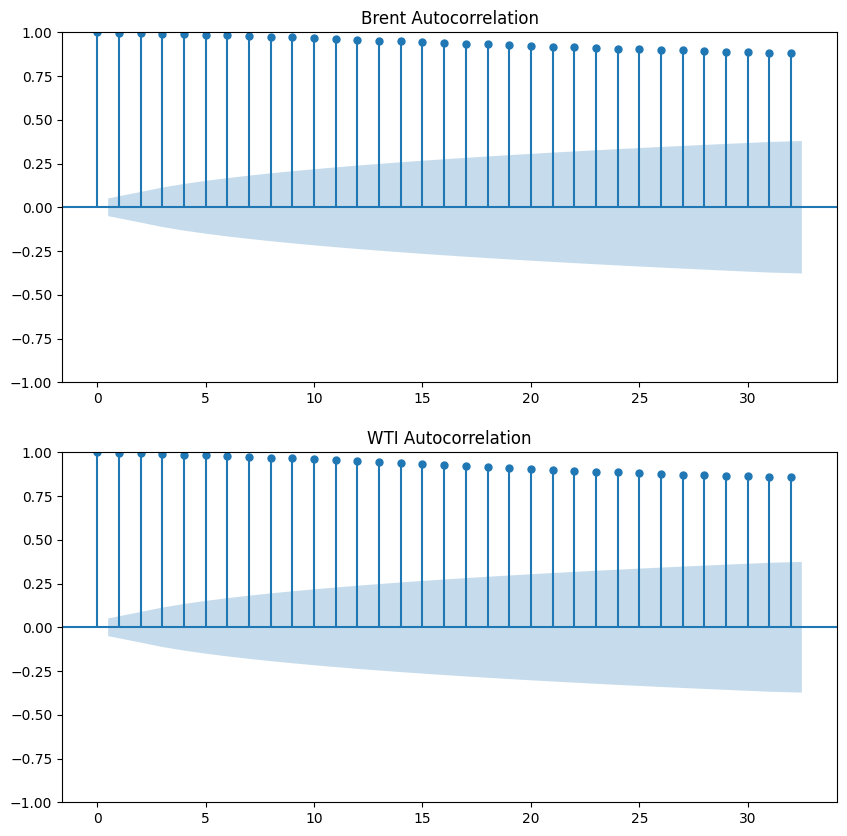

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf

# Load Brent and WTI crude oil prices
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv", usecols=["Date", "Brent Spot Price"])
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv", usecols=["Date", "WTI Spot Price"])

# Merge Brent and WTI data on date
merged_data = pd.merge(brent_data, wti_data, on="Date")

# Convert Date column to datetime and set as index
merged_data["Date"] = pd.to_datetime(merged_data["Date"])
merged_data.set_index("Date", inplace=True)

# Apply KPSS test to Brent and WTI
brent_kpss = kpss(merged_data["Brent Spot Price"], nlags="auto", regression="c")
wti_kpss = kpss(merged_data["WTI Spot Price"], nlags="auto", regression="c")

# Print the test statistics and p-values
print("Brent KPSS Test:")
print(f"Test Statistic: {brent_kpss[0]}")
print(f"P-value: {brent_kpss[1]}")
print(f"Lags Used: {brent_kpss[2]}")
print("Critical Values:")
for key, value in brent_kpss[3].items():
    print(f"   {key}: {value}")

print("\nWTI KPSS Test:")
print(f"Test Statistic: {wti_kpss[0]}")
print(f"P-value: {wti_kpss[1]}")
print(f"Lags Used: {wti_kpss[2]}")
print("Critical Values:")
for key, value in wti_kpss[3].items():
    print(f"   {key}: {value}")

# Plot autocorrelation for Brent and WTI
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
plot_acf(merged_data["Brent Spot Price"], ax=axes[0], title="Brent Autocorrelation")
plot_acf(merged_data["WTI Spot Price"], ax=axes[1], title="WTI Autocorrelation")
plt.show()


## data last 2 year

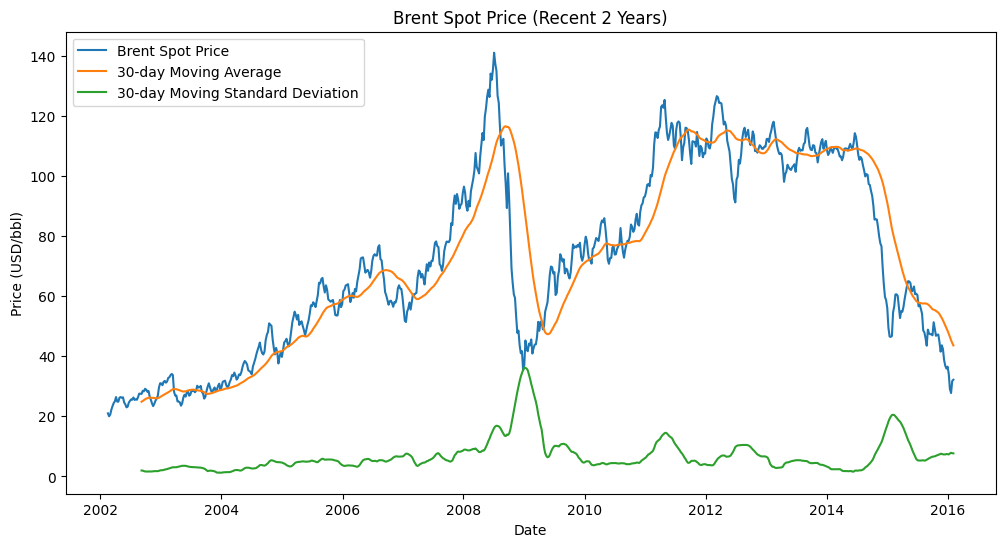

KPSS Test:
Test Statistic: 2.171362125951092
P-value: 0.01
Lags Used: 17
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss

# Load Brent crude oil prices
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv", usecols=["Date", "Brent Spot Price"])

# Convert Date column to datetime and set as index
brent_data["Date"] = pd.to_datetime(brent_data["Date"])
brent_data.set_index("Date", inplace=True)

# Take the most recent 2 years of data
recent_brent_data = brent_data.tail(730)

# Plot the data with trend, mean, and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(recent_brent_data, label="Brent Spot Price")
plt.plot(recent_brent_data.rolling(window=30).mean(), label="30-day Moving Average")
plt.plot(recent_brent_data.rolling(window=30).std(), label="30-day Moving Standard Deviation")
plt.title("Brent Spot Price (Recent 2 Years)")
plt.xlabel("Date")
plt.ylabel("Price (USD/bbl)")
plt.legend()
plt.show()

# Apply KPSS test to recent Brent data
kpss_test = kpss(recent_brent_data["Brent Spot Price"], nlags="auto", regression="c")

# Print the test statistics and p-values
print("KPSS Test:")
print(f"Test Statistic: {kpss_test[0]}")
print(f"P-value: {kpss_test[1]}")
print(f"Lags Used: {kpss_test[2]}")
print("Critical Values:")
for key, value in kpss_test[3].items():
    print(f"   {key}: {value}")


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Brent KPSS Test:
Test Statistic: 1.4546602951096663
P-value: 0.01
Lags Used: 6
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

WTI KPSS Test:
Test Statistic: 1.4312804908823291
P-value: 0.01
Lags Used: 6
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


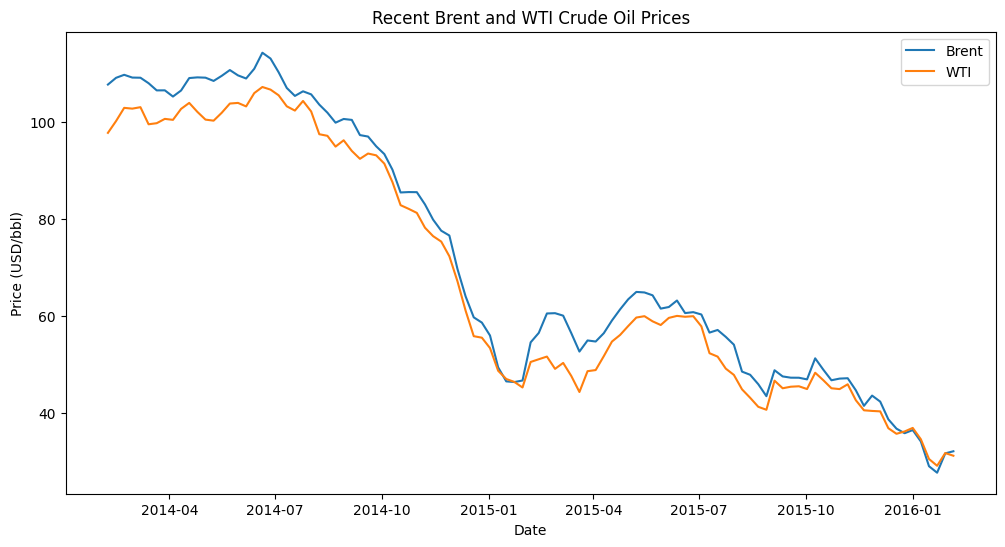

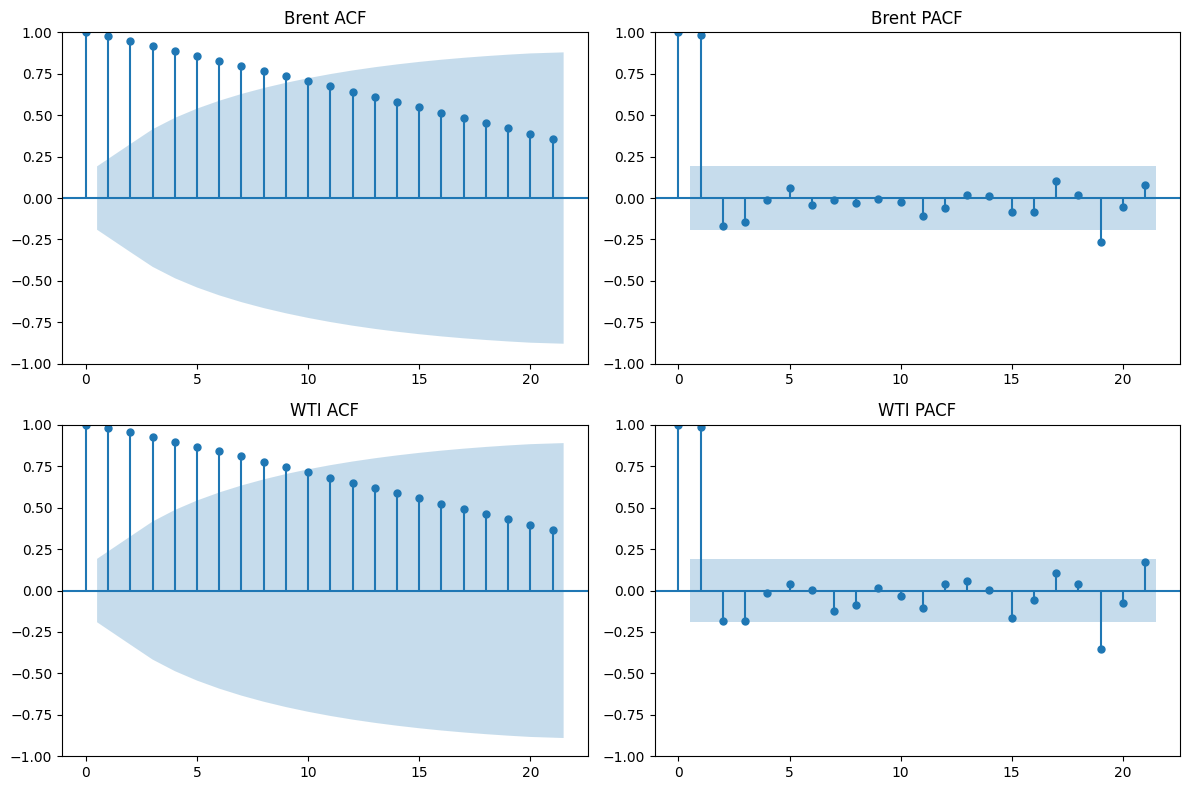

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load Brent and WTI crude oil prices
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv", usecols=["Date", "Brent Spot Price"])
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv", usecols=["Date", "WTI Spot Price"])

# Merge Brent and WTI data on date
merged_data = pd.merge(brent_data, wti_data, on="Date")

# Convert Date column to datetime and set as index
merged_data["Date"] = pd.to_datetime(merged_data["Date"])
merged_data.set_index("Date", inplace=True)

# Select the most recent 2 years of data
recent_data = merged_data.loc[merged_data.index >= merged_data.index.max() - pd.DateOffset(years=2)]

# Plot Brent and WTI prices
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(recent_data.index, recent_data["Brent Spot Price"], label="Brent")
ax.plot(recent_data.index, recent_data["WTI Spot Price"], label="WTI")
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD/bbl)")
ax.set_title("Recent Brent and WTI Crude Oil Prices")
ax.legend()

# Apply KPSS test to Brent and WTI
brent_kpss = kpss(recent_data["Brent Spot Price"], nlags="auto", regression="c")
wti_kpss = kpss(recent_data["WTI Spot Price"], nlags="auto", regression="c")

# Print the test statistics and p-values
print("Brent KPSS Test:")
print(f"Test Statistic: {brent_kpss[0]}")
print(f"P-value: {brent_kpss[1]}")
print(f"Lags Used: {brent_kpss[2]}")
print("Critical Values:")
for key, value in brent_kpss[3].items():
    print(f"   {key}: {value}")
    
print("\nWTI KPSS Test:")
print(f"Test Statistic: {wti_kpss[0]}")
print(f"P-value: {wti_kpss[1]}")
print(f"Lags Used: {wti_kpss[2]}")
print("Critical Values:")
for key, value in wti_kpss[3].items():
    print(f"   {key}: {value}")

# Plot autocorrelation and partial autocorrelation plots for Brent and WTI
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(recent_data["Brent Spot Price"], ax=axs[0, 0], title="Brent ACF")
plot_pacf(recent_data["Brent Spot Price"], ax=axs[0, 1], title="Brent PACF")
plot_acf(recent_data["WTI Spot Price"], ax=axs[1, 0], title="WTI ACF")
plot_pacf(recent_data["WTI Spot Price"], ax=axs[1, 1], title="WTI PACF")
plt.tight_layout()
plt.show()


The autocorrelation function (ACF) and partial autocorrelation function (PACF) plots are useful tools for analyzing time series data.

The ACF measures the correlation between a time series and its lagged values, while the PACF measures the correlation between the time series and its lagged values, controlling for the effect of earlier lags.

Here are some general guidelines for interpreting ACF and PACF plots:

ACF plot:

ACF plot helps in determining the order of the Moving Average (MA) term in the ARIMA model.
The vertical lines on the ACF plot represent confidence intervals for the correlation coefficients. If a lag has a correlation coefficient outside the confidence interval, it suggests that the lag is statistically significant.
The decay of the ACF plot shows the degree of autocorrelation. If the autocorrelation decays slowly, it suggests that there is a long memory in the data.
PACF plot:

PACF plot helps in determining the order of the AutoRegressive (AR) term in the ARIMA model.
The vertical lines on the PACF plot also represent confidence intervals for the correlation coefficients. If a lag has a correlation coefficient outside the confidence interval, it suggests that the lag is statistically significant.
A significant PACF value at lag k indicates that there is a correlation between the current value and the value k periods ago, and there are no significant correlations at the lags between them. This means that the PACF plot helps identify the direct effect of past values on the current value.
Based on these guidelines, you can use the ACF and PACF plots to determine the orders of the ARIMA model. The order of the model consists of three parameters: p, d, and q, where p is the order of the AR term, d is the degree of differencing, and q is the order of the MA term. You can choose the values of p and q based on the significant lag values in the PACF and ACF plots, respectively. The value of d is the degree of differencing required to make the time series stationary.

After identifying the orders of the model, you can estimate the model parameters and check the model's goodness of fit using diagnostic tests such as the Ljung-Box test, residuals plot, and so on.

To determine the MA factor for ARIMA, we need to look at the ACF plot. The MA factor is the number of lagged error terms that we want to include in the model. We can choose the MA factor by looking at where the ACF plot cuts off or becomes close to zero.

In your case, the ACF plot shows a significant spike at lag 1, which suggests that there is a strong autocorrelation at lag 1. The ACF plot then tapers off and becomes close to zero after around lag 10, which suggests that an MA(10) model might be appropriate.

However, it's important to note that choosing the right order of an ARIMA model can be challenging and requires domain knowledge, experimentation, and statistical tests. In addition to the ACF and PACF plots, we can also use information criteria like AIC and BIC to compare the performance of different models and select the best one.

To determine the AR term in ARIMA, you can use the PACF plot. The partial autocorrelation function (PACF) plot measures the correlation between the time series and its own lagged values while controlling for the effect of other lags. In other words, it shows how much of the autocorrelation at a certain lag is explained by the previous lags.

The AR term in ARIMA is the number of lagged values of the time series that should be included in the model. In general, you should look for a significant spike at lag 1 in the PACF plot, as this indicates that there is a strong relationship between the time series and its first lagged value. If there are significant spikes at multiple lags, you should choose the smallest number of lags that can explain the autocorrelation in the data.

In the PACF plot you provided, there are significant spikes at lags 1 and 2, which suggests that an AR model with one or two lags might be appropriate. You should also consider the ACF plot to determine if a MA term is needed.

Once you have identified the ACF and PACF plots, you can use them to determine the order of the ARIMA model. Here are some general guidelines for selecting the model order:

1.   If the ACF plot shows a gradual decay and the PACF plot has a sharp cutoff at lag k, then you may want to use an AR model of order k.
2.   If the PACF plot shows a gradual decay and the ACF plot has a sharp cutoff at lag k, then you may want to use an MA model of order k.
3.   If both the ACF and PACF plots show gradual decay, then you may want to use an ARMA model of order (p, q), where p is the order of the AR component and q is the order of the MA component.
4.   If the ACF plot has a seasonal pattern, you may want to use a SARIMA model.



In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load Brent crude oil price data
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv", usecols=["Date", "Brent Spot Price"], index_col="Date", parse_dates=True)

# Create an ARIMA model with order (p, d, q)
model = ARIMA(brent_data, order=(2, 1, 2))

# Fit the model to the data
results = model.fit()

# Print the summary of the model fit
print(results.summary())


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       Brent Spot Price   No. Observations:                 1500
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3127.569
Date:                Sun, 09 Apr 2023   AIC                           6265.138
Time:                        01:44:48   BIC                           6291.701
Sample:                    05-15-1987   HQIC                          6275.034
                         - 02-05-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7281      0.159      4.573      0.000       0.416       1.040
ar.L2          0.1030      0.107      0.966      0.334      -0.106       0.312
ma.L1         -0.5132      0.158     -3.252      0.0

In this example, we created an ARIMA model with order (2, 1, 2), which means we used an AR(2) model for the first differences of the data, and an MA(2) model for the errors. We then fit the model to the Brent crude oil price data and printed a summary of the model fit. The summary provides information on the coefficients, standard errors, t-values, and p-values of the model parameters, 

*   List item
*   List item

as well as the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for model selection.

The output you provided shows the results of the ARIMA model with parameters (2, 1, 2).


*   The first part of the output provides information on the model specifications, including the number of observations, the order of the ARIMA model, and the log likelihood.
*   The second part shows the model selection criteria, such as the Akaike Information Criterion (AIC), the Bayesian Information Criterion (BIC), and the Hannan-Quinn Information Criterion (HQIC).
*   The third part presents the coefficient estimates and their standard errors. Here, the coefficients are the autoregressive (AR) and moving average (MA) parameters, which were selected based on the ACF and PACF plots we discussed earlier.
*   The fourth part shows the variance-covariance matrix of the coefficients and their associated p-values.
*   The fifth part presents some diagnostic tests for the model, including the Ljung-Box test for autocorrelation of residuals and the Jarque-Bera test for normality of residuals.
*   Finally, the output also displays some warnings related to the covariance matrix calculation method.

To interpret the results, you should focus on the estimated coefficients and their associated standard errors. The coefficients represent the weights assigned to the past observations of the time series. The standard errors indicate the degree of uncertainty in the coefficient estimates.

For example, in this model, the first AR coefficient (ar.L1) is estimated to be 0.7281, which suggests that the current value of the time series is positively influenced by its previous value with a weight of 0.7281. The second AR coefficient (ar.L2) is estimated to be 0.1030, which is not statistically significant at the 5% level, as its associated p-value is 0.334. The first MA coefficient (ma.L1) is estimated to be -0.5132, which suggests that the current value of the time series is negatively influenced by its previous error term with a weight of 0.5132. The second MA coefficient (ma.L2) is also negative and statistically significant, with an estimated weight of -0.2068.

The diagnostic tests at the bottom of the output suggest that the model residuals are not significantly autocorrelated and exhibit no significant departures from normality. This indicates that the model is a good fit for the data. However, you should also evaluate the model performance using out-of-sample data and other model selection criteria to ensure the model's robustness.

In [13]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load Brent and WTI crude oil prices
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv", usecols=["Date", "Brent Spot Price"], index_col="Date", parse_dates=True)
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv", usecols=["Date", "WTI Spot Price"], index_col="Date", parse_dates=True)

# Merge Brent and WTI data on date
merged_data = pd.merge(brent_data, wti_data, on="Date")

# Select the most recent 1 year of data
recent_data = merged_data.loc[merged_data.index >= merged_data.index.max() - pd.DateOffset(years=1)]

# Create an ARIMA model with order (p, d, q)
brent_model = ARIMA(recent_data["Brent Spot Price"], order=(2, 1, 2))
wti_model = ARIMA(recent_data["WTI Spot Price"], order=(2, 1, 2))

# Fit the models to the data
brent_results = brent_model.fit()
wti_results = wti_model.fit()

# Print the summary of the model fit for Brent and WTI
print("Brent Summary:\n", brent_results.summary())
print("\nWTI Summary:\n", wti_results.summary())


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self.

Brent Summary:
                                SARIMAX Results                                
Dep. Variable:       Brent Spot Price   No. Observations:                   53
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -116.388
Date:                Sun, 09 Apr 2023   AIC                            242.777
Time:                        02:05:52   BIC                            252.533
Sample:                    02-06-2015   HQIC                           246.517
                         - 02-05-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3447      0.743      0.464      0.643      -1.112       1.801
ar.L2          0.5788      0.401      1.445      0.149      -0.206       1.364
ma.L1         -0.0524      0.801    

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

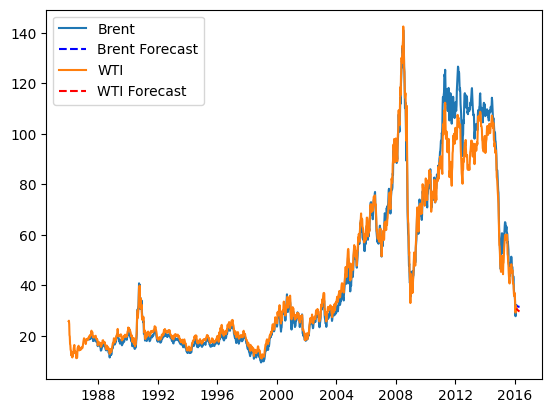

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load Brent and WTI oil price data
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv", usecols=["Date", "Brent Spot Price"], index_col="Date", parse_dates=True)
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv", usecols=["Date", "WTI Spot Price"], index_col="Date", parse_dates=True)

# Merge the two datasets by date
oil_data = pd.merge(brent_data, wti_data, how='outer', left_index=True, right_index=True)

# Define the SARIMAX model
model_brent = sm.tsa.SARIMAX(brent_data, order=(2, 1, 2), trend='c')
model_wti = sm.tsa.SARIMAX(wti_data, order=(2, 1, 2), trend='c')

# Fit the model to the data
results_brent = model_brent.fit()
results_wti = model_wti.fit()

# Forecast future oil prices
future_brent = results_brent.forecast(steps=12)
future_wti = results_wti.forecast(steps=12)

# Plot the historical and forecasted oil prices
plt.plot(oil_data.index, oil_data['Brent Spot Price'], label='Brent')
plt.plot(future_brent.index, future_brent, linestyle='--', color='b', label='Brent Forecast')
plt.plot(oil_data.index, oil_data['WTI Spot Price'], label='WTI')
plt.plot(future_wti.index, future_wti, linestyle='--', color='r', label='WTI Forecast')
plt.legend()
plt.show()



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

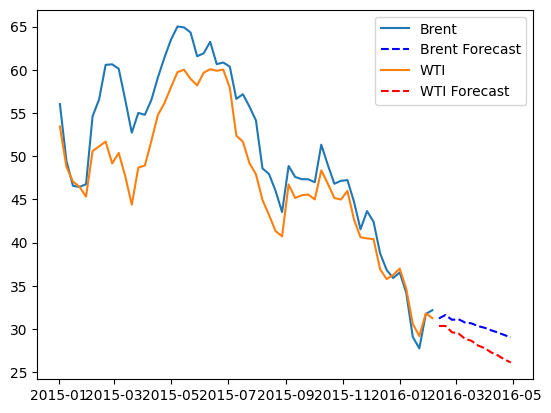

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load Brent and WTI oil price data
brent_data = pd.read_csv("https://datahub.io/core/oil-prices/r/0.csv", usecols=["Date", "Brent Spot Price"], index_col="Date", parse_dates=True)
wti_data = pd.read_csv("https://datahub.io/core/oil-prices/r/3.csv", usecols=["Date", "WTI Spot Price"], index_col="Date", parse_dates=True)

# Merge the two datasets by date
oil_data = pd.merge(brent_data, wti_data, how='outer', left_index=True, right_index=True)

# Subset the data since 2015
oil_data = oil_data['2015':]

# Define the SARIMAX model
model_brent = sm.tsa.SARIMAX(oil_data['Brent Spot Price'], order=(2, 1, 2), trend='c')
model_wti = sm.tsa.SARIMAX(oil_data['WTI Spot Price'], order=(2, 1, 2), trend='c')

# Fit the model to the data
results_brent = model_brent.fit()
results_wti = model_wti.fit()

# Forecast future oil prices
future_brent = results_brent.forecast(steps=12)
future_wti = results_wti.forecast(steps=12)

# Plot the historical and forecasted oil prices
plt.plot(oil_data.index, oil_data['Brent Spot Price'], label='Brent')
plt.plot(future_brent.index, future_brent, linestyle='--', color='b', label='Brent Forecast')
plt.plot(oil_data.index, oil_data['WTI Spot Price'], label='WTI')
plt.plot(future_wti.index, future_wti, linestyle='--', color='r', label='WTI Forecast')
plt.legend()
plt.show()
